<a href="https://colab.research.google.com/github/Fireiest/ibit_nft/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
df = pdr.get_data_yahoo('GBPUSD=X')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [4]:
def lagit(df, lags):

  names = []

  for i in range(1,lags +1):
    df['Lag_'+str(i)] = df['returns'].shift(i)
    names.append('Lag_'+str(i))
  return names

In [5]:
lagnames = lagit(df,10)

In [6]:
df.dropna(inplace=True)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
model.fit(df[lagnames], df['returns'])

LinearRegression()

In [10]:
df['prediction_LR'] = model.predict(df[lagnames])

In [11]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df.prediction_LR]

In [12]:
df['strat_LR'] = df['direction_LR'] * df['returns']

In [13]:
np.exp(df[['returns', 'strat_LR']].sum())

returns     0.724012
strat_LR    1.585534
dtype: float64

<Axes: xlabel='Date'>

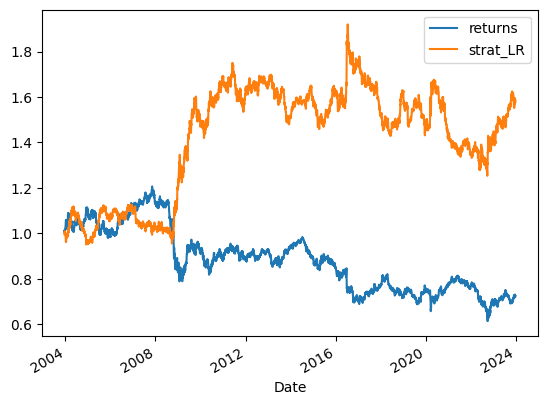

In [14]:
np.exp(df[['returns', 'strat_LR']].cumsum()).plot()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train,test = train_test_split(df, shuffle=False, test_size=0.3, random_state=0)

In [17]:
train = train.copy()

In [18]:
test = test.copy()

In [19]:
model = LinearRegression()

In [20]:
model.fit(train[lagnames], train['returns'])

LinearRegression()

In [21]:
test['prediction_LR'] = model.predict(test[lagnames])

In [22]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [23]:
test['strat_LR'] = test['direction_LR'] * test['returns']

In [24]:
np.exp(test[['returns', 'strat_LR']].sum())

returns     0.946551
strat_LR    1.188952
dtype: float64

In [25]:
(test['direction_LR'].diff() != 0).value_counts()

False    997
True     565
Name: direction_LR, dtype: int64

<Axes: xlabel='Date'>

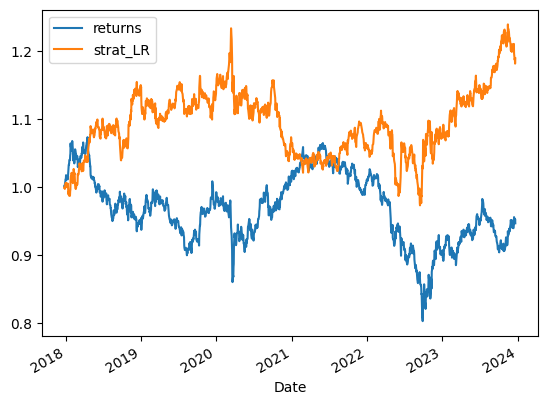

In [26]:
np.exp(test[['returns', 'strat_LR']].cumsum()).plot()